Showing gain control can create anticipative signals
by using both HMM and LPOU signal

created by ckc on Sept 9, 2021

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import signal
from scipy.fftpack import fft, fftfreq
from scipy.io import loadmat
from scipy.signal import savgol_filter
%matplotlib inline
from random import gauss

In [34]:
# OU
Tot=300
dt=0.001
tAxis=np.arange(dt,Tot,dt)
tau=0.6
D = 1
L=np.zeros_like(tAxis)
mu, sigma = 0, 1
for i in range(len(tAxis)-1):
    L[i+1]=L[i]*(1-dt/tau)+math.sqrt(D*dt)*np.random.normal(mu,sigma)

In [88]:
# filtering
fc=0.6
b, a = signal.butter(2, 2*fc*dt, btype='low', analog=False)
x = signal.filtfilt(b, a, L)

x = (x-min(x))/(max(x)-min(x))*1

In [89]:
#AGC
y = np.zeros_like(x)
gain =np.ones_like(x)
delay = int(10/0.05)
tau = delay*dt
for i in range(delay,len(x)):
    gain[i] = 1/(1+y[i-delay]**2)
    y[i]= gain[i]*x[i]

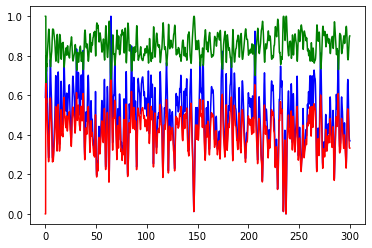

In [90]:
plt.plot(tAxis,x,'b')
plt.plot(tAxis,y,'r')
plt.plot(tAxis,gain,'g')
# plt.xlim(100,110)

In [91]:
xAutoConvolve = np.convolve( x-np.mean(x), x-np.mean(x), 'same' )
xAutoCorrelate = np.correlate( x-np.mean(x), x-np.mean(x), 'same' )
xyCorrelate = np.correlate( y-np.mean(y), y-np.mean(y), 'same' )

(148000.0, 152000.0)

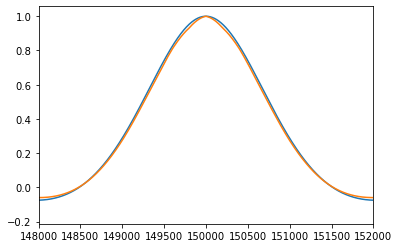

In [92]:
# plt.plot(xAutoConvolve)
plt.plot( xAutoCorrelate/max(xAutoCorrelate) )
plt.plot( xyCorrelate/max(xyCorrelate) )
plt.xlim(148000, 152000)

In [40]:
def FFT_quick(data, dt, center = False):
    if center:
        xft=fft(data-np.mean(data))
    else:
        xft=fft(data)
    # xftreal = xft.real  
    # xftimg = xft.imag
    # xft_abs=abs(xft)
    xft_nor=xft/len(xft)
    # xft_nor2=xft_nor[range(int(len(xft_nor)/2))]
    freq=fftfreq(len(x), d=dt)
    # freq=freq[range(int(len(freq)/2))]
    # phase=np.angle(xft)
    # phase=phase[range(int(len(phase)/2))]

    xft_nor = np.append( xft_nor[np.argmin(freq):],xft_nor[:np.argmin(freq)] )
    freq2 = np.append( freq[np.argmin(freq):], freq[:np.argmin(freq)] )
    return freq2,xft_nor

In [41]:
def angular_gradient(x):
    diffx= np.gradient(x)
    diffx[np.abs(diffx)>0.6*np.pi] -= np.pi*diffx[np.abs(diffx)>0.6*np.pi]/abs(diffx[np.abs(diffx)>0.6*np.pi])
    return diffx

In [42]:
freq,FT_x=FFT_quick(x, dt)
freq,FT_y=FFT_quick(y, dt)

print(FT_y[freq==0])
print(FT_x[freq==0])

[0.43277246-0.j]
[0.5249615-0.j]


(100.0, 103.0)

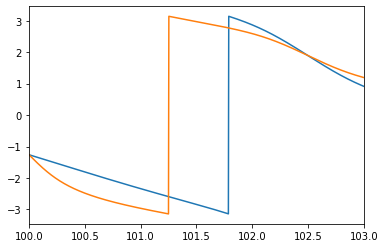

In [82]:
plt.plot(freq, np.angle(FT_yy))
plt.plot(freq, np.angle(FT_y))
# plt.plot(freq, np.abs(FT_y))
df = np.mean( np.diff(freq) )
# plt.plot(freq, G)
# plt.ylim(0,1)
plt.xlim(100,103)
# plt.ylim(0,0.002)

In [43]:
H = FT_y/FT_x
G = np.abs(H)
Phi = np.angle(H)
delta = -angular_gradient(x)/np.mean(np.diff(freq))

(0.0, 5.0)

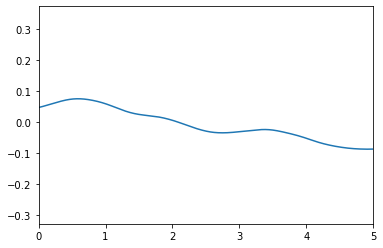

In [44]:
plt.plot(freq, delta)
# plt.plot(freq, G)
# plt.ylim(0,1)
plt.xlim(0,5)

In [45]:
freq,FT_yy=FFT_quick(y**2, dt)
print(FT_yy[freq==0])

[0.19653631-0.j]


In [46]:
# FT_yy2=np.convolve(FT_y, FT_y, 'same')

In [47]:
# np.max(FT_yy2)

In [48]:
np.mean(y)**2, np.mean(y**2)

(0.18729200216673458, 0.19653630820999612)

(-0.05, 0.05)

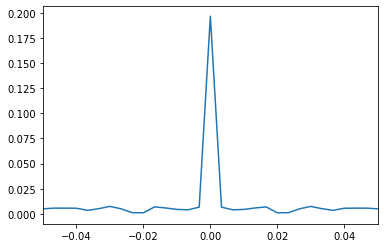

In [49]:
# plt.plot(freq, FT_yy.real)
# plt.plot(freq, FT_yy.imag)
# plt.plot(freq, FT_y.real)
# plt.plot(freq, FT_y.imag)

plt.plot(freq, np.abs(FT_yy))
# plt.plot(freq, np.abs(FT_yy2))
# plt.plot(freq, np.abs(FT_y))
# plt.plot(freq, np.angle(FT_yy))
plt.xlim(-0.05,0.05)

In [50]:
phaseshift = np.exp(1j*2*np.pi*freq*tau)
Gamma = FT_yy*phaseshift

(-0.05, 0.05)

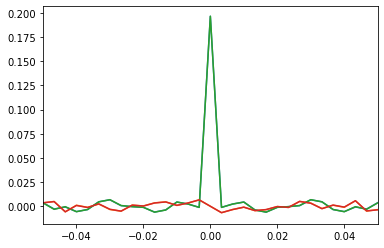

In [51]:
plt.plot(freq, Gamma.real)
plt.plot(freq, Gamma.imag)

plt.plot(freq, FT_yy.real)
plt.plot(freq, FT_yy.imag)

# plt.plot(freq, np.abs(Gamma))
plt.xlim(-0.05,0.05)

# Change Magnitude

In [52]:

# for mag in np.arange(1,10):
#     y = np.zeros_like(x)
#     gain =np.ones_like(x)
#     for i in range(delay,len(x)):
#         gain[i] = 1/(1+y[i-delay]**2)
#         y[i]= gain[i]*mag*x[i]
    
#     y = y/mag
#     # plt.plot(tAxis,y)
#     freq,FT_x=FFT_quick(x, dt)
#     freq,FT_y=FFT_quick(y, dt)
#     # H = FT_y/FT_x
#     # Phi = np.angle(H)
#     # delta = -angular_gradient(x)/np.mean(np.diff(freq))
#     # plt.plot(freq, delta)
#     plt.plot(freq, FT_y)
# plt.xlim(7,8)
# # plt.xlim(100,110)